In [1]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.6 MB/s eta 0:00:00
  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.4/103.4 kB 3.1 MB/s eta 0:00:00
  Using cached Jinja2-3.1.3-py3-none-any.whl.metadata (3.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.8 MB/s eta 0:00:00
  Using cached urllib3-2.2.1-py3-none-any.whl.metadata (6.4 kB)
  Using cached certifi-2024.2.2-py3-none-any.whl.metadata (2.2 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 51.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 42.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.5/157.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━

In [2]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 50.5 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 23.3 MB/s eta 0:00:00:00:0100:01


In [4]:
!pip install pandas

  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 49.7 MB/s eta 0:00:00:00:010:01
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)


In [5]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

**LOAD**

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/twitter_sentiment.csv', header= None, index_col= 0)
df.head()

,1,2,3
0,,,
2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2401,Borderlands,Positive,im coming on borderlands and i will murder you...
2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [7]:
df = df[[2,3]].reset_index(drop= True)
df.head()

,2,3
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [8]:
df.columns = ['sentiment', 'text']
df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


**Data Exploration**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [10]:
df.describe()

,sentiment,text
count,75682,74996
unique,4,69972
top,Negative,It is not the first time that the EU Commissio...
freq,22808,172


In [11]:
df.isnull().sum()
df.dropna(inplace= True)
# df = df[df['text'].apply(len)]

In [12]:
sum(df['text'].apply(len)>5), sum(df['text'].apply(len)<=5)

(72883, 2113)

In [13]:
df.isnull().sum()


sentiment    0
text         0
dtype: int64

In [14]:
print(df.shape)
df = df[df['text'].apply(len)>5]
print(df.shape)

(74996, 2)
(72883, 2)


In [15]:
df['sentiment'].value_counts()

sentiment
Negative      22020
Positive      20186
Neutral       17899
Irrelevant    12778
Name: count, dtype: int64

PREPROCESSING TEXT

In [16]:
pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-al70h60s
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-al70h60s
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 96bf02872d9756f29d6cddb8aafaedcd2a39bbb4
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7603 sha256=e89431ca6d43241cf391a0f0e406e7697b8deb74bb21db394c5f95ce7632d22c
  Stored in directory: /tmp/pip-ephem-wheel-cache-mnl7gf1b/wheels/d1/c3/bb/559fe93e652b51cbc532f17e9693f3b70055f8560cf06c1fb3
Successfully built preprocess-kgptalkie
Note: you may need to restart the kernel to use updated packages.


In [17]:
import preprocess_kgptalkie as ps

df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [18]:
df = ps.get_basic_features(df)

In [19]:
df.columns

Index(['sentiment', 'text', 'char_counts', 'word_counts', 'avg_wordlength',
       'stopwords_counts', 'hashtag_counts', 'mentions_counts',
       'digits_counts', 'uppercase_counts'],
      dtype='object')

In [20]:
df.head()

,sentiment,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,Positive,im getting on borderlands and i will murder yo...,43,11,3.909091,6,0,0,1,0
1,Positive,I am coming to the borders and I will kill you...,40,12,3.333333,6,0,0,1,2
2,Positive,im getting on borderlands and i will kill you ...,41,10,4.100000,5,0,0,1,0
3,Positive,im coming on borderlands and i will murder you...,42,10,4.200000,5,0,0,1,0
4,Positive,im getting on borderlands 2 and i will murder ...,46,12,3.833333,6,0,0,2,0


In [21]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 8.0 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 50.1 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.0/305.0 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 47.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 44.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 3.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


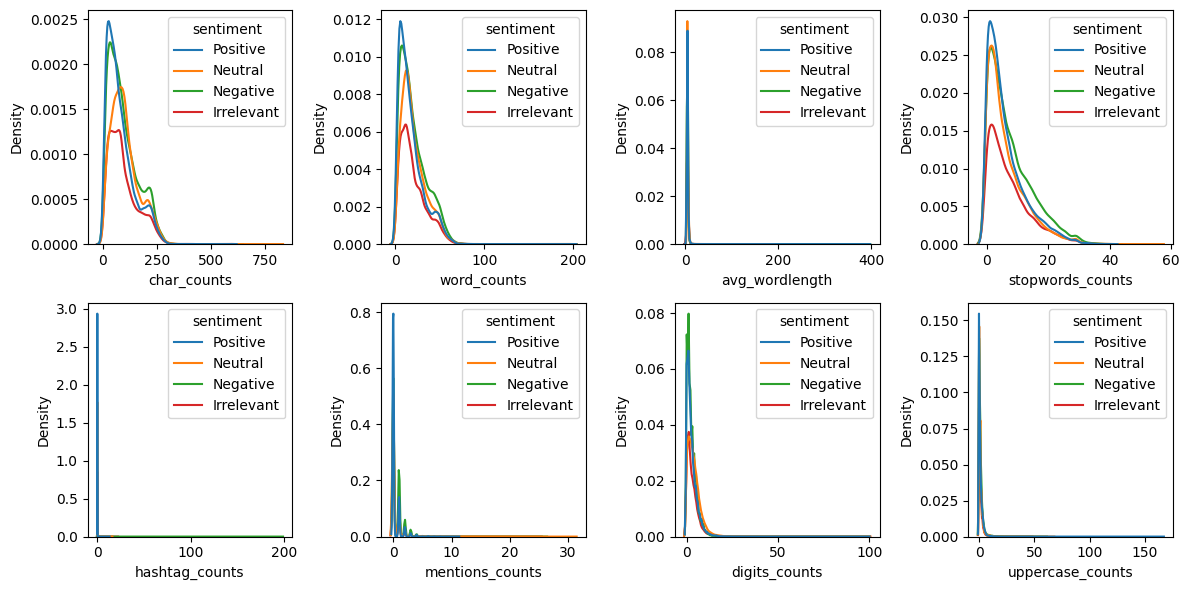

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
num_cols = df.select_dtypes(include='number').columns

for index, col in enumerate(num_cols):
    plt.subplot(2, 4, index+1)
    sns.kdeplot(data = df, x = col, hue="sentiment", fill=False )

plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

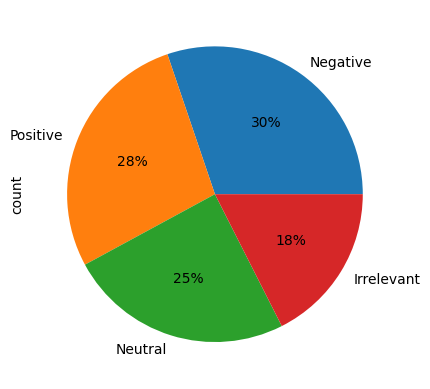

In [23]:
df['sentiment'].value_counts().plot(kind='pie', autopct="%1.0f%%")

In [24]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.6/513.6 kB 11.3 MB/s eta 0:00:0000:01


In [25]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

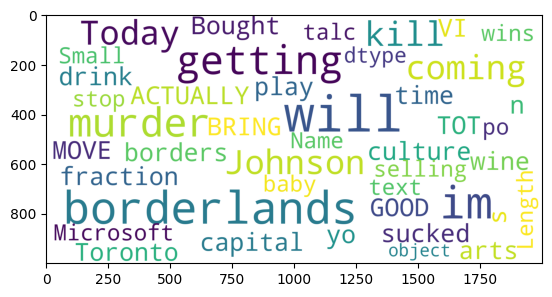

In [26]:
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=300, max_font_size=40, scale=5).generate(str(df['text']))
plt.imshow(wordcloud)

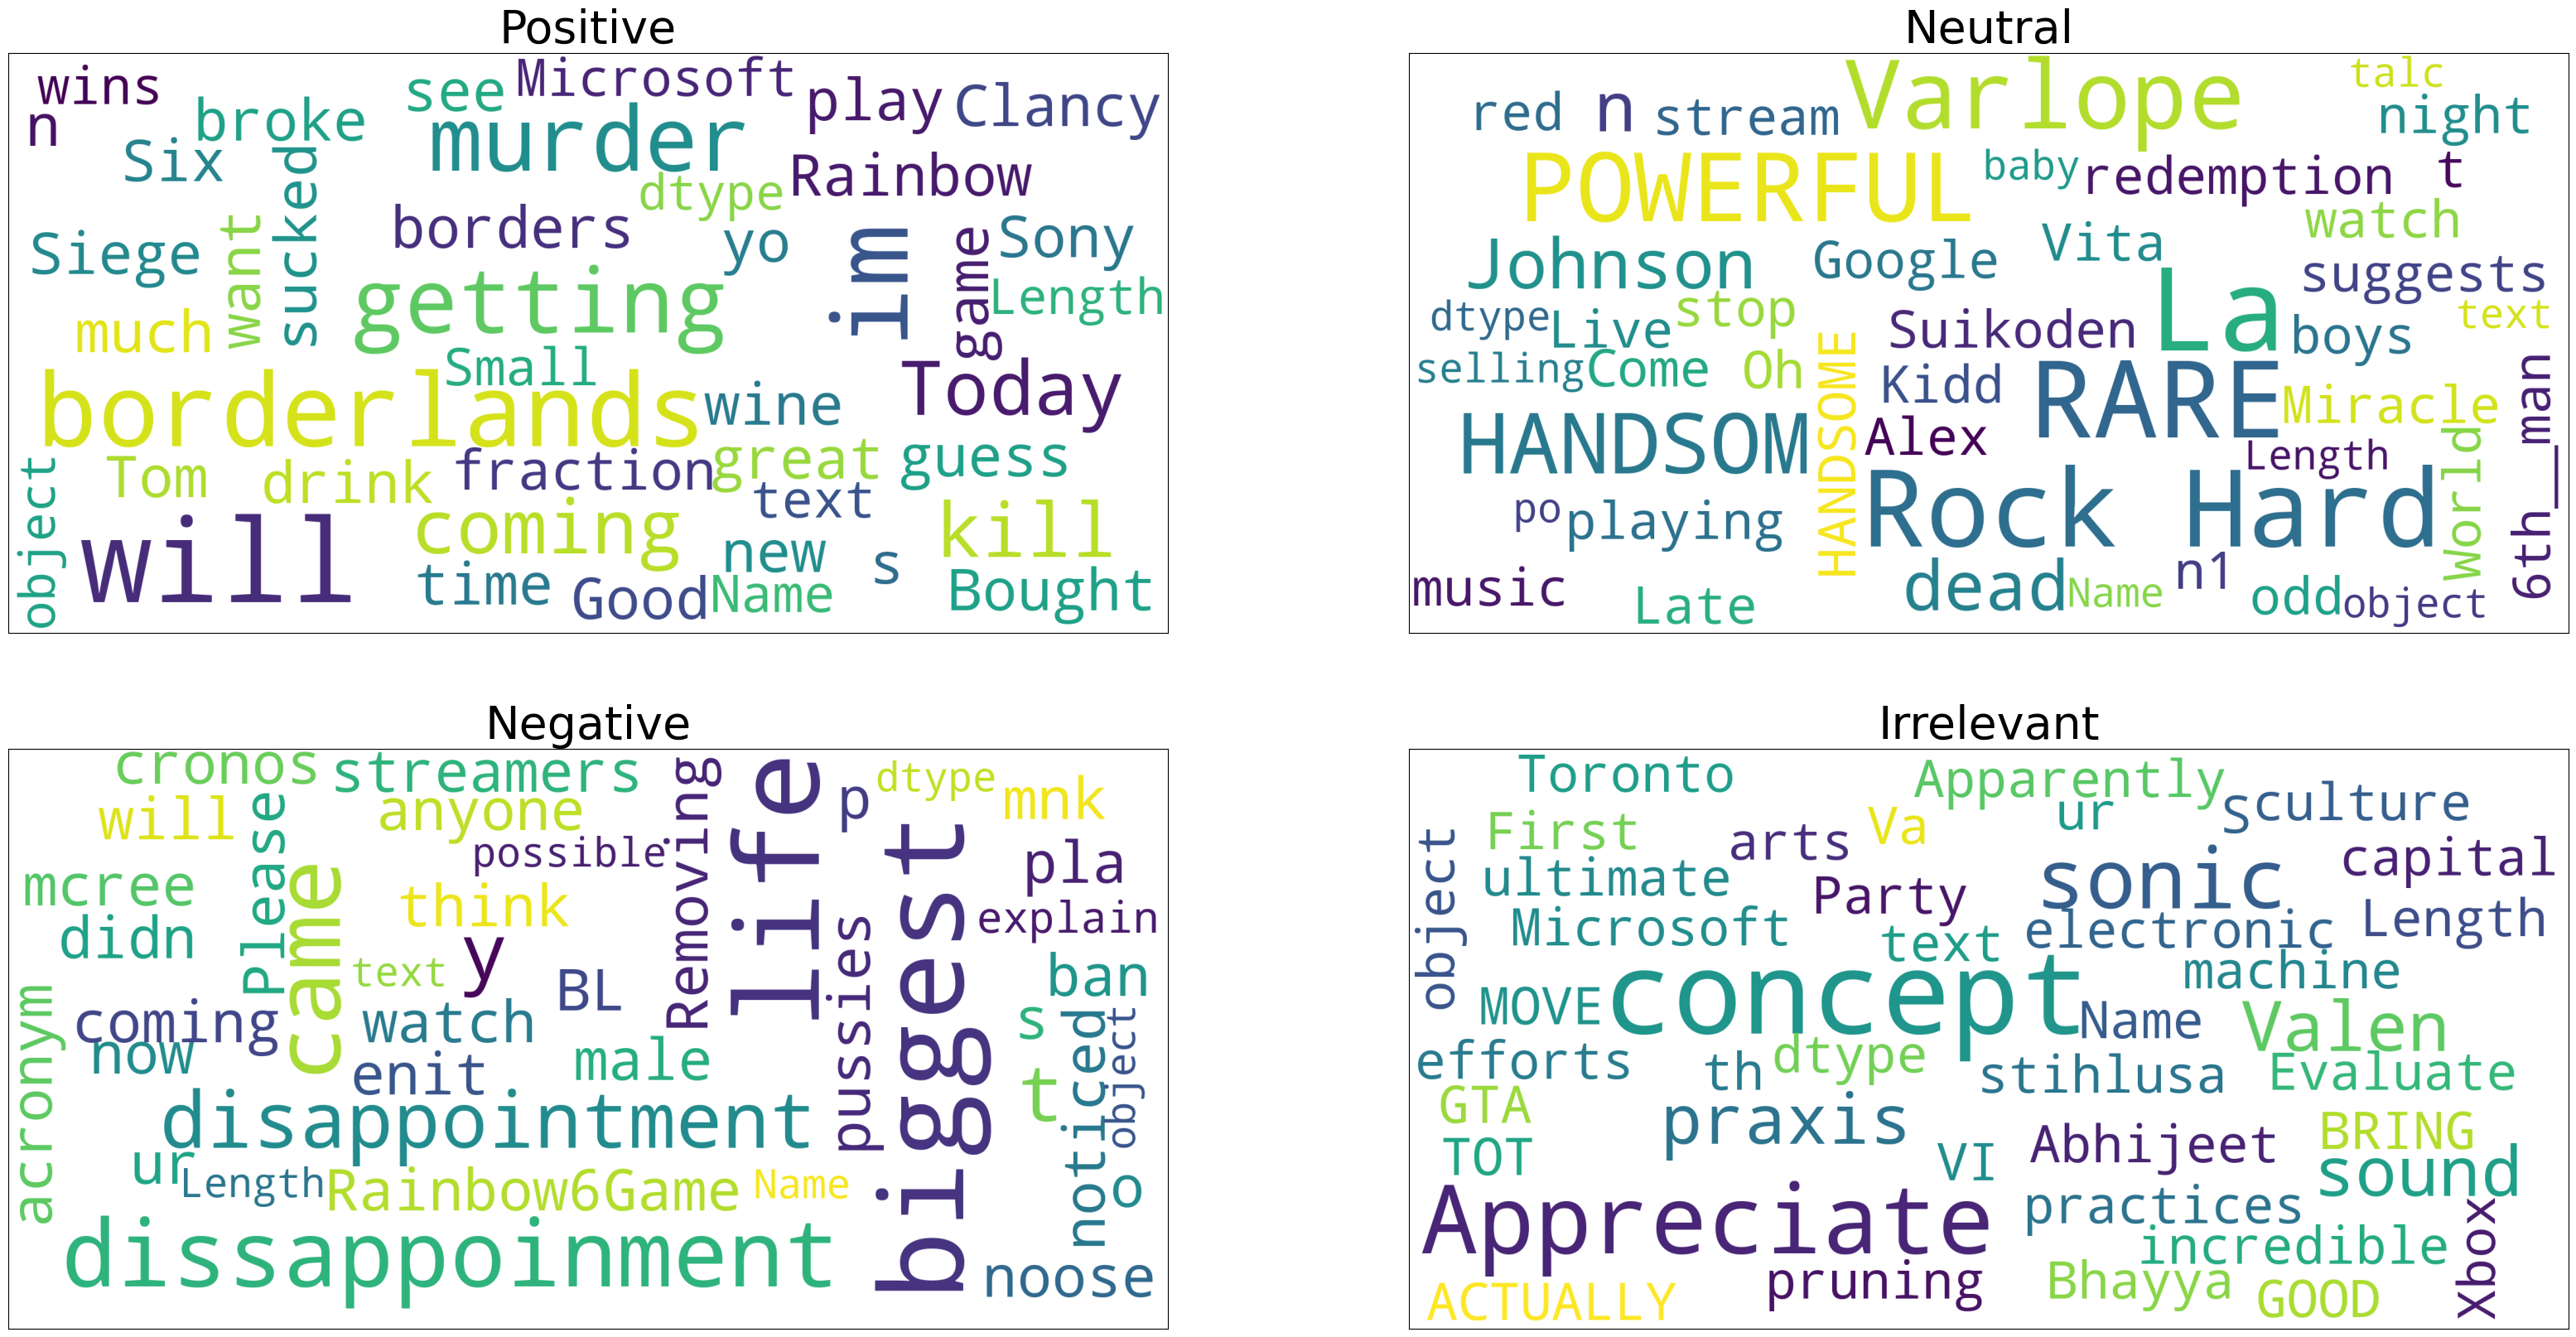

In [27]:
plt.figure(figsize=(40, 20))

for index, sent in enumerate(df['sentiment'].unique()):
    plt.subplot(2, 2, index+1)

    data=df[df['sentiment']==sent]['text']
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=300, 
                          max_font_size=40, scale=5).generate(str(data))
    plt.imshow(wordcloud)
    plt.xticks([])
    plt.yticks([])
    plt.title(sent, fontsize=40)

   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB 217.9 kB/s eta 0:00:18
   ---------------------------------------- 0.0/3.8 MB 217.9 kB/s eta 0:00:18
   ---------------------------------------- 0.0/3.8 MB 217.9 kB/s eta 0:00:18
   ---------------------------------------- 0.0/3.8 MB 217.9 kB/s eta 0:00:18
   ---------------------------------------- 0.0/3.8 MB 109.3 kB/s eta 0:00:35
    --------------------------------------- 0.1/3.8 MB 148.8 kB/s eta 0:00:26
    --------------------------------------- 0.1/3

**CLEANING**

In [28]:
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(lambda x: ps.remove_urls(x))
df['text'] = df['text'].apply(lambda x: ps.remove_rt(x))
df['text'] = df['text'].apply(lambda x: ps.remove_special_chars(x))


**TRAIN TEST SPLIT**

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_text = train_test_split(df['text'], 
                                                    df['sentiment'],
                                                    test_size=0.2,
                                                    random_state=0 )


**MODEL**

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [31]:

clf = Pipeline([('tfid', TfidfVectorizer(stop_words='english')), 
                ('rfc', RandomForestClassifier(n_jobs=-1))])

clf.fit(X_train, y_train)

Pipeline(steps=[('tfid', TfidfVectorizer(stop_words='english')),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

EVALUATE

In [32]:
from sklearn.metrics import classification_report

In [33]:

y_pred = clf.predict(X_test)
print(classification_report(y_text, y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.96      0.85      0.90      2561
    Negative       0.93      0.94      0.93      4481
     Neutral       0.92      0.90      0.91      3553
    Positive       0.87      0.94      0.90      3982

    accuracy                           0.91     14577
   macro avg       0.92      0.91      0.91     14577
weighted avg       0.92      0.91      0.91     14577



In [34]:
import pickle

pickle.dump(clf, open("twitter_sentiment.pkl", 'wb'))

In [35]:
clf.predict(['let me not upset you'])

array(['Negative'], dtype=object)

In [37]:
!pip install scikit-learn


In [38]:
import sklearn